**Iris Flower Species Classification using Decision Tree Classifier**

**Uploading the dataset file**

In [ ]:
from google.colab import files
u=files.upload()

Saving archive (2).zip to archive (2).zip


In [ ]:
#Extracting the zip file
import zipfile
zip=zipfile.ZipFile("/content/archive (2).zip","r")
zip.extractall('/content')
zip.close()

In [ ]:
import pandas as pd
data=pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Dropping unnecessary column
data= data.drop(columns=['Id'])

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
#Checking numerical and categorical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Checking any null values if present
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Scatterplotting
from matplotlib import pyplot as plt
colors = ['yellow', 'green', 'violet']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

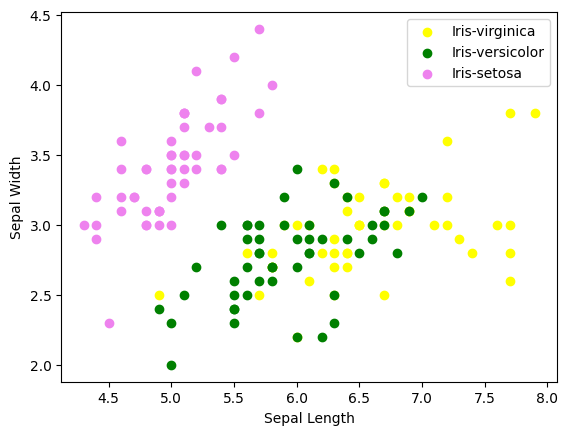

In [ ]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

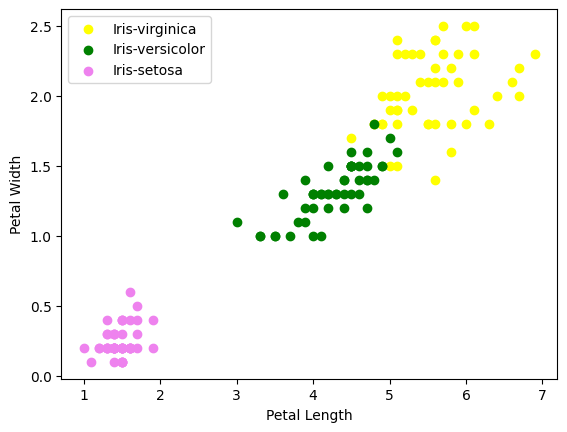

In [ ]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

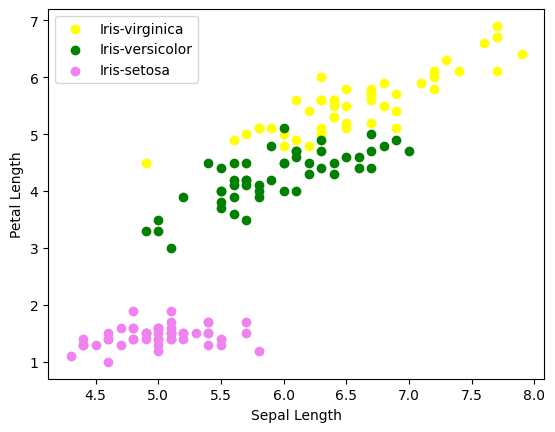

In [ ]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

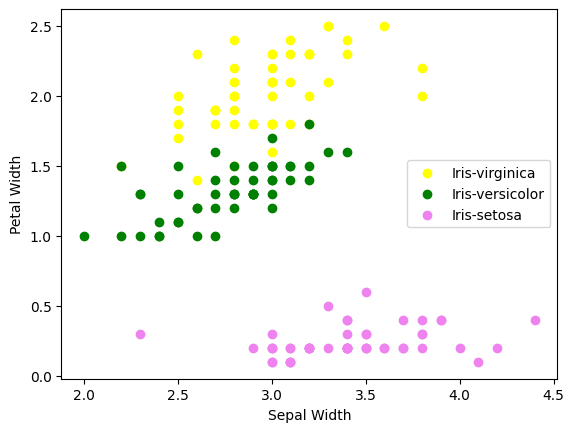

In [ ]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

**From above Scatter Plots we can conclude that the accuracy score of Iris-setosa will be 100% as there is no overlapping of this species with others i.e. it is linearly seperable from other 2 classes**

In [ ]:
#Label encoding the Categorical variable(Species)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data['Species'].unique()

array([0, 1, 2])

**Splitting the data to Train and Test**

In [ ]:
X=data.drop(columns=['Species'])
y=data['Species']

In [ ]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

**Training 80% and Testing 20% of the data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [ ]:
X_train_prediction = dt_classifier.predict(X_train)
X_test_prediction  = dt_classifier.predict(X_test)

print('Training Accuracy : ', accuracy_score(Y_train,X_train_prediction))
print('Testing  Accuracy : ', accuracy_score(Y_test, X_test_prediction))

Training Accuracy :  1.0
Testing  Accuracy :  0.9333333333333333


In [ ]:
print('Training Set f1 score Micro: ', f1_score(Y_train,X_train_prediction,average='micro'))
print('Testing  Set f1 score : ', f1_score(Y_test, X_test_prediction,average='micro'))
print()
print('Test set precision : ', precision_score(Y_test, X_test_prediction,average='micro'))
print('Test set recall    : ', recall_score(Y_test, X_test_prediction,average='micro'))

Training Set f1 score Micro:  1.0
Testing  Set f1 score :  0.9333333333333333

Test set precision :  0.9333333333333333
Test set recall    :  0.9333333333333333


**Testing our Model to Classify the particular Iris Flower Species by taking required User Inputs**

In [ ]:
import warnings
# Filter out the UserWarning about feature names
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

while True:
    try:
        sepal_length = float(input('Enter sepal length: '))
        sepal_width = float(input('Enter sepal width: '))
        petal_length = float(input('Enter petal length: '))
        petal_width = float(input('Enter petal width: '))

        y_pred = [[sepal_length, sepal_width, petal_length, petal_width]]
        prediction_value = dt_classifier.predict(y_pred)[0]

        if prediction_value == 0:
            print('The flower is classified as Iris-Setosa')
        elif prediction_value == 1:
            print('The flower is classified as Versicolor')
        else:
            print('The flower is classified as Virginica')

    except ValueError:
        print('Invalid input. Please enter numerical values.')
    except KeyboardInterrupt:
        print('Exiting...')
        break


Enter sepal length: 5
Enter sepal width: 3.6
Enter petal length: 1.4
Enter petal width: 0.2
The flower is classified as Iris-Setosa
Enter sepal length: 6.1
Enter sepal width: 2.9
Enter petal length: 3.6
Enter petal width: 1.3
The flower is classified as Versicolor
Enter sepal length: 6.5
Enter sepal width: 3.2
Enter petal length: 5.1
Enter petal width: 2
The flower is classified as Virginica
Exiting...


**Visualizing the graph**

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

# Visualize the Decision Tree
dot_data = export_graphviz(
    dt_classifier,
    out_file=None,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This will save the tree to a file named "decision_tree.pdf"

'decision_tree.pdf'

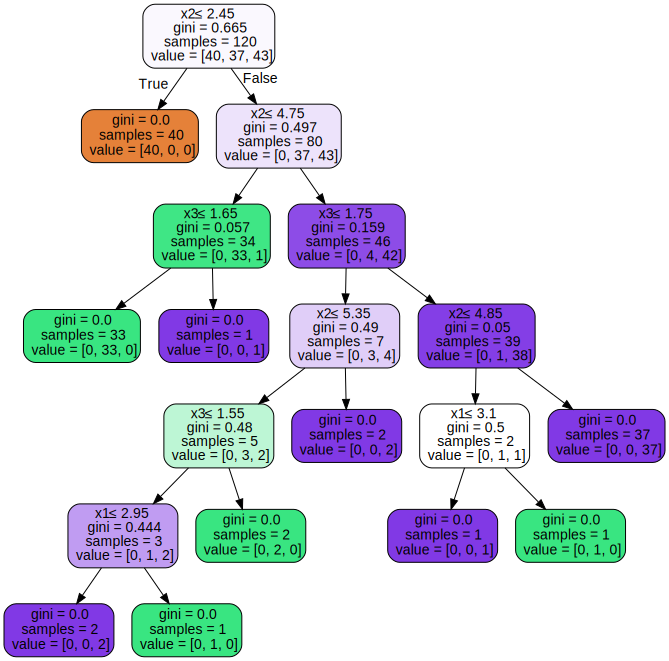

In [ ]:
graph